<a href="https://colab.research.google.com/github/Code-Test-Source/MCM26-25Crepo/blob/main/Figure_1_Medal_list_of_2024_Summer_Olympic_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

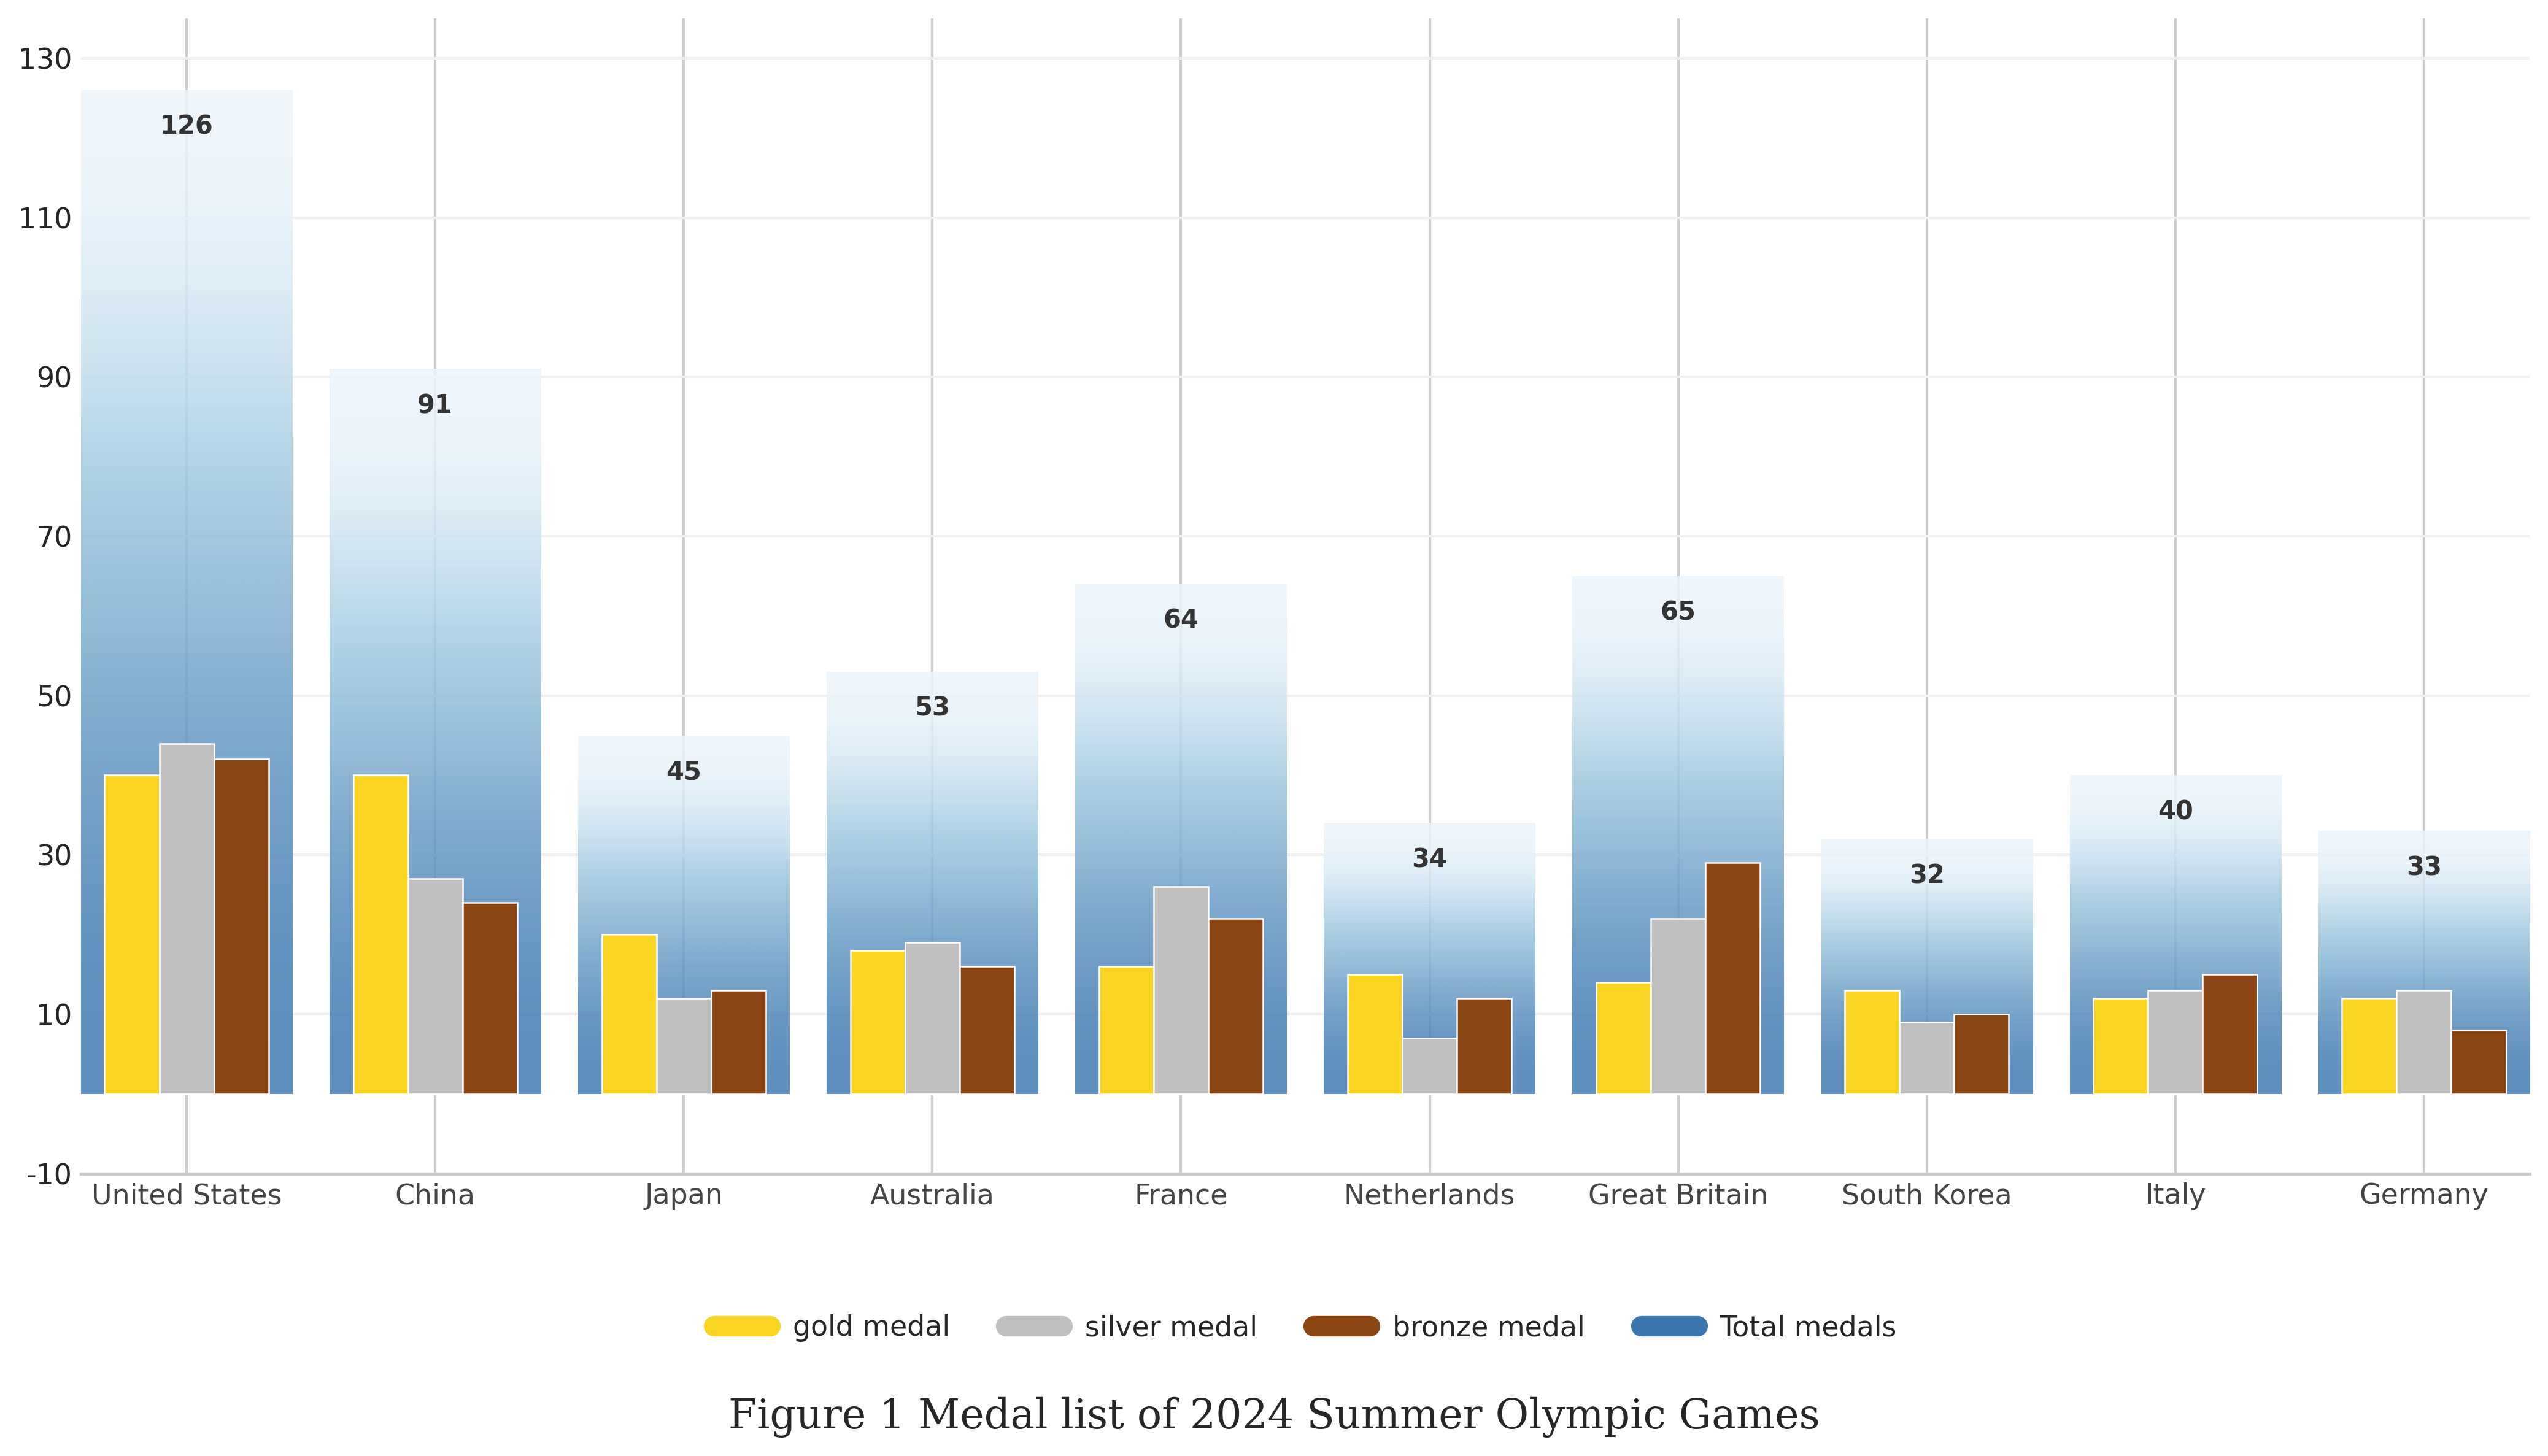

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap

# 1. 准备数据
data = {
    'Country': ['United States', 'China', 'Japan', 'Australia', 'France',
                'Netherlands', 'Great Britain', 'South Korea', 'Italy', 'Germany'],
    'Gold': [40, 40, 20, 18, 16, 15, 14, 13, 12, 12],
    'Silver': [44, 27, 12, 19, 26, 7, 22, 9, 13, 13],
    'Bronze': [42, 24, 13, 16, 22, 12, 29, 10, 15, 8],
    'Total': [126, 91, 45, 53, 64, 34, 65, 32, 40, 33]
}
df = pd.DataFrame(data)

# 2. 基础布局参数
n_countries = len(df)
x = np.arange(n_countries)
medal_width = 0.22
total_bar_width = 0.85
offsets = [-medal_width, 0, medal_width]

fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

# --- 核心修改：强化渐变色 ---
# 0.0 是底部，1.0 是顶部。通过添加 0.8 处的颜色，让蓝色一直延伸到 80% 的高度才开始明显变淡
colors = [
    (0.0, "#3B76AF"),  # 底部：较深的钢蓝色
    (0.7, "#A6CEE3"),  # 中上部：依然保持天蓝色
    (1.0, "#F7FBFF")   # 顶部：极浅的蓝白色（不完全消失）
]
cmap = LinearSegmentedColormap.from_list("strong_blue_grad", colors)

# 3. 绘制 "Total" 渐变背景柱
for i, val in enumerate(df['Total']):
    rect = Rectangle((i - total_bar_width/2, 0), total_bar_width, val, visible=False)
    ax.add_patch(rect)

    # 填充渐变色
    im = ax.imshow([[1, 1], [0, 0]], interpolation='bicubic', cmap=cmap,
                   extent=(i - total_bar_width/2, i + total_bar_width/2, 0, val),
                   aspect='auto', zorder=1, alpha=0.85)
    im.set_clip_path(rect)

    # 总数数值标签
    ax.text(i, val - 3, str(val), ha='center', va='top',
            fontsize=10, color='#333333', fontweight='bold', zorder=5)

# 4. 绘制 "金银铜" 分组柱状图 (精确居中)
medal_colors = ['#F9D423', '#C0C0C0', '#8B4513']
medal_labels = ['gold medal', 'silver medal', 'bronze medal']
medal_columns = ['Gold', 'Silver', 'Bronze']

for idx, col in enumerate(medal_columns):
    bars = ax.bar(x + offsets[idx], df[col], medal_width,
                  label=medal_labels[idx], color=medal_colors[idx],
                  zorder=4, edgecolor='white', linewidth=0.6)

    # 奖牌柱内部数值
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h/2, f'{int(h)}',
                ha='center', va='center', fontsize=8, color='#333333', fontweight='semibold')

# 5. 样式精调
ax.set_ylim(-10, 135)
ax.set_yticks(range(-10, 131, 20))
ax.set_xticks(x)
ax.set_xticklabels(df['Country'], fontsize=11, color='#444444')

sns.despine(left=True, top=True, right=True)
ax.yaxis.grid(True, linestyle='-', which='major', color='#F0F0F0', zorder=0)
ax.tick_params(axis='both', which='both', length=0)

# 6. 图例设置
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='#F9D423', lw=8, label='gold medal'),
    Line2D([0], [0], color='#C0C0C0', lw=8, label='silver medal'),
    Line2D([0], [0], color='#8B4513', lw=8, label='bronze medal'),
    Line2D([0], [0], color='#3B76AF', lw=8, label='Total medals') # 更新图例颜色以匹配
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.1),
          ncol=4, frameon=False, fontsize=11)

# 7. 添加标题
plt.figtext(0.5, 0.02, "Figure 1 Medal list of 2024 Summer Olympic Games",
            ha="center", fontsize=16, fontfamily='serif')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()